In [1]:
from __future__ import print_function
import numpy as np # Biblioteca de funciones matematicas de alto nivel
np.random.seed(1337)  # for reproducibility
#import tensorflow as tf
#import keras  
import pandas as pd

In [2]:
dataset = pd.read_csv('train.csv', encoding = "ISO-8859-1") # lectura de datos
dataset1 = pd.read_csv('test.csv', encoding = "ISO-8859-1") # lectura de datos
dataset2 = pd.read_csv('validation.csv', encoding = "ISO-8859-1") # lectura de datos

In [3]:
#Extra check, but we drop inf and nan after 

dataset.replace([np.inf, -np.inf], -1, inplace=True) 
dataset.replace([np.nan, -np.nan], -1, inplace=True)

dataset1.replace([np.inf, -np.inf], -1, inplace=True) 
dataset1.replace([np.nan, -np.nan], -1, inplace=True)

dataset2.replace([np.inf, -np.inf], -1, inplace=True) 
dataset2.replace([np.nan, -np.nan], -1, inplace=True)

In [4]:
# Convert numeric dataset columns to Float

numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    dataset[column] = dataset[column].astype(float)

numeric_columns1 = dataset1.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns1:
    dataset1[column] = dataset1[column].astype(float)

numeric_columns1 = dataset2.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns1:
    dataset2[column] = dataset2[column].astype(float)

In [5]:
# Eliminar espacios en blanco de los nombres de las columnas
dataset.columns = dataset.columns.str.strip()
dataset1.columns = dataset1.columns.str.strip()
dataset2.columns = dataset2.columns.str.strip()

# Convertir los nombres de las columnas a minúsculas
#dataset.columns = dataset.columns.str.lower()
#dataset1.columns = dataset1.columns.str.lower()
#dataset2.columns = dataset2.columns.str.lower()

# Usar el nombre de la columna correcto
Labels = dataset['Label'].unique()
Y_train = dataset["Label"]
Y_test = dataset1["Label"]
Y_validation = dataset2["Label"]

Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
FIN Flag Count
PSH Flag Count
ECE Flag Count
Fwd Avg Bytes/Bulk
Fwd Avg Packets/Bulk
Fwd Avg Bulk Rate
Bwd Avg Bytes/Bulk
Bwd Avg Packets/Bulk
Bwd Avg Bulk Rate


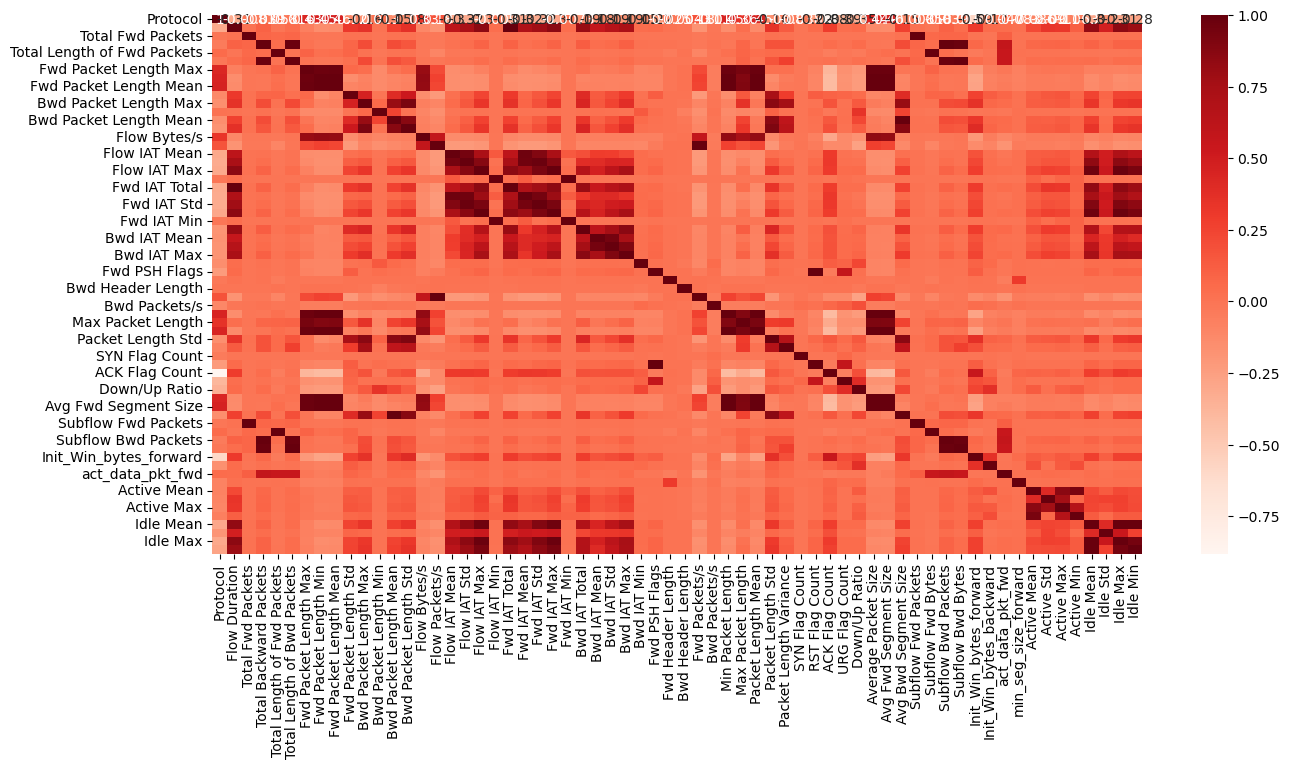

In [6]:
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt

X_train=dataset.iloc[:, 0:76] #Luego obtenemos las características del flujo
X_test=dataset1.iloc[:, 0:76]
X_validation=dataset2.iloc[:, 0:76]

sel = VarianceThreshold(threshold=0)
hola=sel.fit_transform(X_train)

aux=X_train.var()

for col in X_train.columns:
    if X_train[col].var() == 0:
        print(col)
        X_train = X_train.drop(col, axis=1)
        X_test = X_test.drop(col, axis=1)
        X_validation=X_validation.drop(col, axis=1)
        #Aqui iria un drop

plt.figure(figsize=(15, 7))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

features = list(X_train.columns)

#plt.savefig('line_plot.svg') 
#pintar solo con colores

In [7]:
# Convertir las etiquetas de texto a números
Y_train_numeric = pd.get_dummies(Y_train).idxmax(axis=1)

# Obtener los nombres de las etiquetas
label_names = Y_train.unique()

In [8]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
Y_test = lb_make.fit_transform(Y_test)

Labels1 = lb_make.inverse_transform(Y_test)
Labels1 = list(lb_make.classes_)
Labels1
unique1, counts1 = np.unique(Y_train, return_counts=True)
unique1


array(['BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL', 'DrDoS_NTP',
       'DrDoS_NetBIOS', 'DrDoS_SNMP', 'DrDoS_SSDP', 'DrDoS_UDP', 'LDAP',
       'MSSQL', 'NetBIOS', 'Portmap', 'Syn', 'TFTP', 'UDP', 'UDPLag'],
      dtype=object)

In [9]:
# Create the value counts of 'evil' and 'benign' in the dataset
dataset['Label'] = dataset['Label'].apply(lambda x: 'Evil' if x != 'BENIGN' else 'BENIGN')
value_counts = dataset['Label'].value_counts()
print(value_counts)

Label
Evil      1274778
BENIGN      79775
Name: count, dtype: int64


In [10]:
# Separate the 'Evil' and 'BENIGN' datasets
evil_dataset = dataset[dataset['Label'] == 'Evil']
benign_dataset = dataset[dataset['Label'] == 'BENIGN']

# Sample the 'Evil' dataset to match the size of the 'BENIGN' dataset
#evil_sampled = evil_dataset.sample(n=len(benign_dataset), random_state=42)

# Combine the sampled 'Evil' dataset with the 'BENIGN' dataset
balanced_dataset = pd.concat([benign_dataset, evil_dataset])

# Shuffle the combined dataset
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_dataset['Label'].value_counts())

Label
Evil      1274778
BENIGN      79775
Name: count, dtype: int64


In [11]:
import shap

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

#scaler = MinMaxScaler().fit(X_train) # Normalizamos los datos
#trainX = scaler.transform(X_train) # Asi se representan los datos

#testT = scaler.transform(X_test)
X_trainArr=balanced_dataset.to_numpy()

#print(X_trainArr)

In [12]:
# Separate features (X) and labels (Y)
X = balanced_dataset.drop('Label', axis=1)  # Features (exclude the 'Label' column)
Y = balanced_dataset['Label']               # Target labels

# Convert features to numpy array (ensure all features are numeric)
X_trainArr = X.to_numpy()

# Define and train the model
model = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(16,12), activation='relu', max_iter=1200, random_state=0)
)
model.fit(X_trainArr, Y)  # Use X (features) and Y (labels) correctly

print(X_trainArr.shape)
print(Y.shape)  # Should match the number of samples in X_trainArr

(1354553, 76)
(1354553,)


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot as skplt
import time

# Convert X_test to a NumPy array
X_testArr = X_test.to_numpy()

# Get predicted probabilities and apply threshold (0.5)
Y_pred_probs = model.predict(X_testArr)
Y_pred = (Y_pred_probs >= 0.5).astype(int).flatten()  # Convert probabilities to class labels

# Ensure consistent lengths
print(f"Length of Y_test (true labels): {len(Y_test)}, Length of Y_pred (predictions): {len(Y_pred)}")

if len(Y_test) == len(Y_pred):
    # Convert to class labels
    y_test1 = ['Evil' if y == 1 else 'Benign' for y in Y_test]
    y_pred1 = ['Evil' if y == 1 else 'Benign' for y in Y_pred]

    # Classification report
    print(classification_report(y_test1, y_pred1, digits=8, zero_division=0))

    # Confusion matrix plot (raw counts)
    skplt.metrics.plot_confusion_matrix(y_test1, y_pred1, labels=["Evil", "Benign"], normalize=False)
    plt.title("Confusion Matrix - Raw Counts")
    plt.show()

    # Confusion matrix plot (normalized)
    skplt.metrics.plot_confusion_matrix(y_test1, y_pred1, labels=["Evil", "Benign"], normalize=True)
    plt.title("Confusion Matrix - Normalized")
    plt.show()

    # Compute metrics using sklearn's confusion matrix
    cm = confusion_matrix(Y_test, Y_pred, labels=[1, 0])
    TP = cm[0][0]  # True Evil
    TN = cm[1][1]  # True Benign
    FP = cm[1][0]  # False Evil
    FN = cm[0][1]  # False Benign

    print(f"True Positives (Evil): {TP}")
    print(f"True Negatives (Benign): {TN}")
    print(f"False Positives (Benign->Evil): {FP}")
    print(f"False Negatives (Evil->Benign): {FN}")

else:
    print(f"Mismatch: True labels ({len(Y_test)}) vs predicted ({len(Y_pred)}).")

ValueError: X has 64 features, but StandardScaler is expecting 76 features as input.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred1, digits=8, zero_division= "warn"))

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test1, y_pred1)
skplt.metrics.plot_confusion_matrix(y_test1, y_pred1, normalize= True)
# Rotate x-axis and y-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()